In [1]:
import torch
import numpy as np
from utils import visualize
import matplotlib
import matplotlib.pyplot as plt
import imageio
from visuals_util import rotate_point_cloud_x, rotate_point_cloud_y, rotate_point_cloud_y, load_pvd_output, visualize_pointcloud, get_axis_ranges
from tqdm import tqdm
%matplotlib widget

In [2]:
import numpy as np

def ball_query(point_cloud, centroid, radius):
    """
    Perform a ball query on a point cloud.

    Args:
    - point_cloud (np.ndarray): The point cloud, assumed to be an Nx3 array.
    - centroid (np.ndarray): The centroid point, a 1x3 array.
    - radius (float): The radius of the sphere within which to search for points.

    Returns:
    - np.ndarray: An array of points within the specified radius of the centroid.
    """
    # Calculate squared distances from the centroid to each point
    distances_squared = np.sum((point_cloud - centroid) ** 2, axis=1)

    # Find points where the squared distance is less than the squared radius
    within_radius = distances_squared < radius ** 2

    # Return points within the radius
    return point_cloud[within_radius]


In [3]:
chair = load_pvd_output(filename="chair_pc_data.pth")

In [4]:
# visualize_pointcloud(chair, title="Chair", show_axis=False)

  0%|          | 0/3 [00:00<?, ?it/s]

/var/folders/0k/mvfs15g90173v31nmz_k7f480000gn/T/ipykernel_63569/3238684722.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
 67%|██████▋   | 2/3 [00:00<00:00,  3.21it/s]/Users/stephanschmiedmayer/Developer/adl4cv/coarse-to-fine-shapes/visuals_util.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()
100%|██████████| 3/3 [00:00<00:00,  3.21it/s]


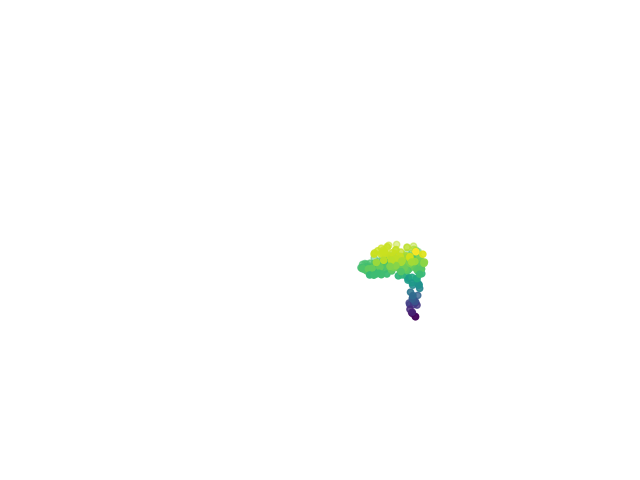

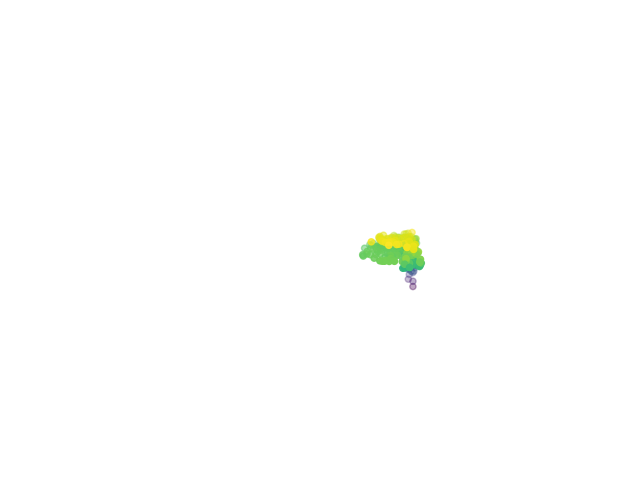

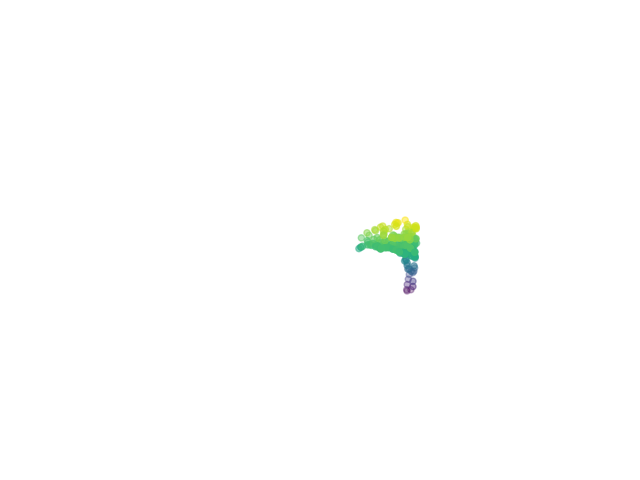

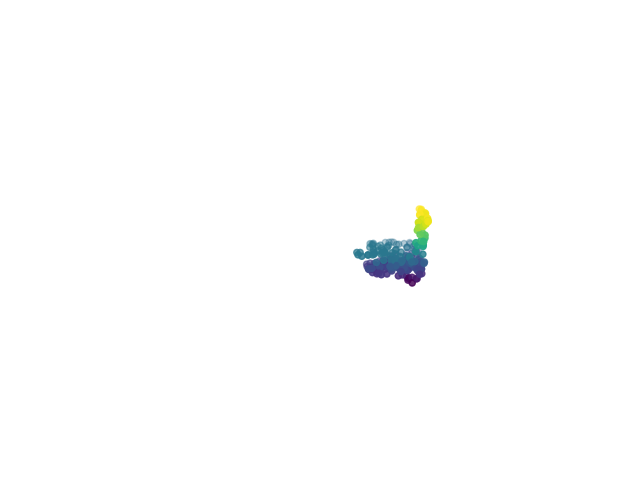

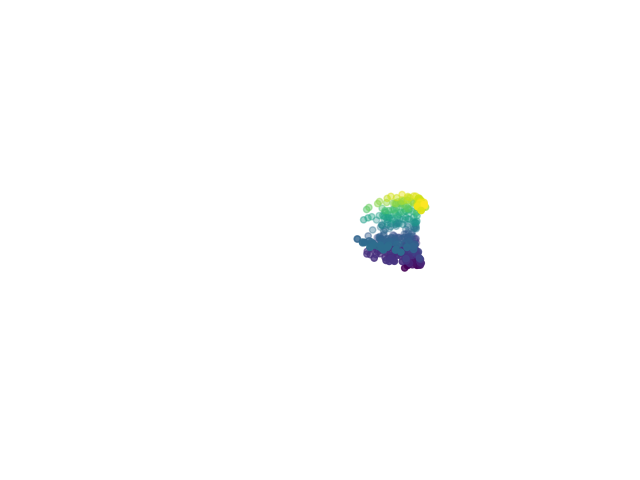

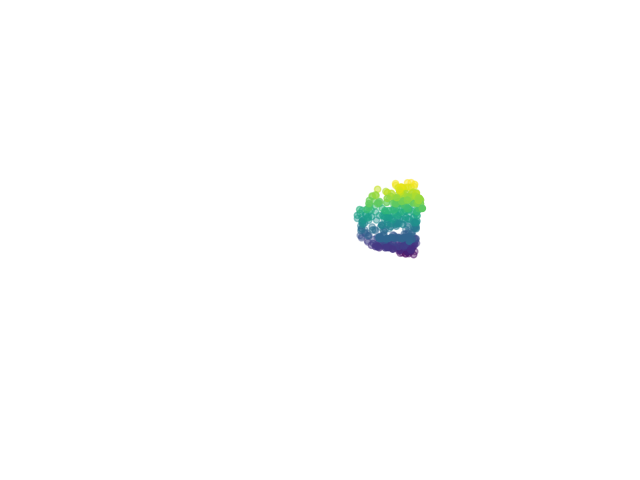

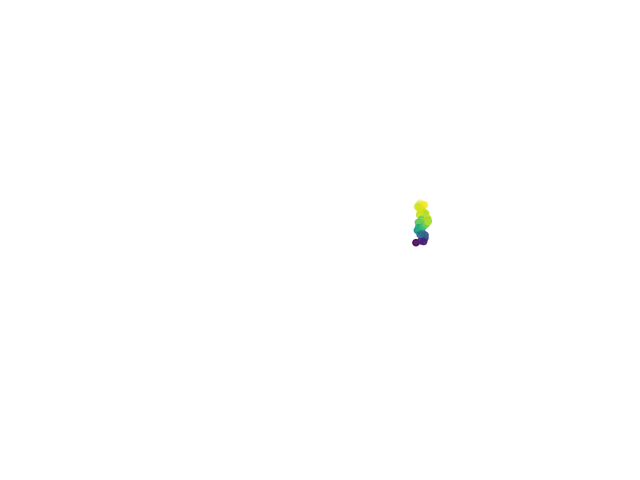

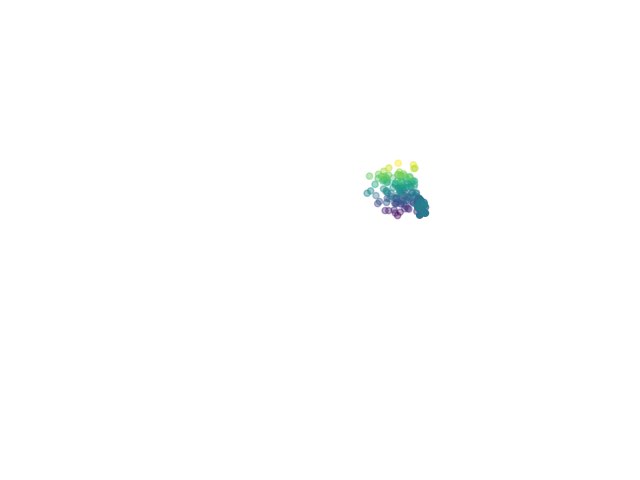

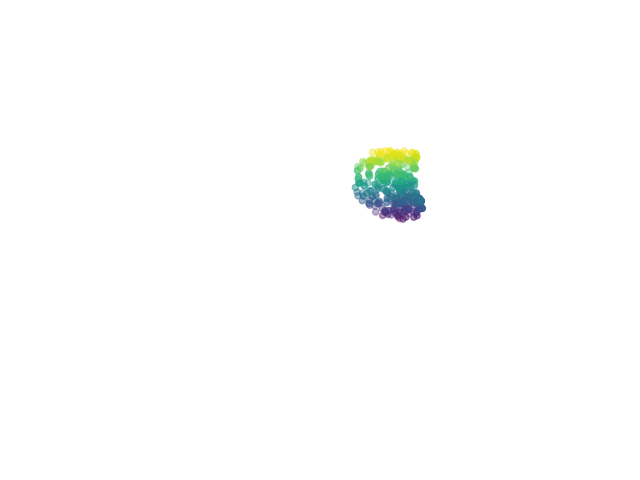

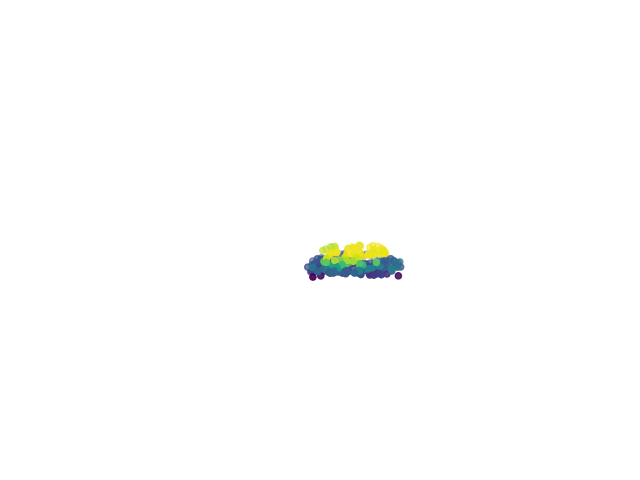

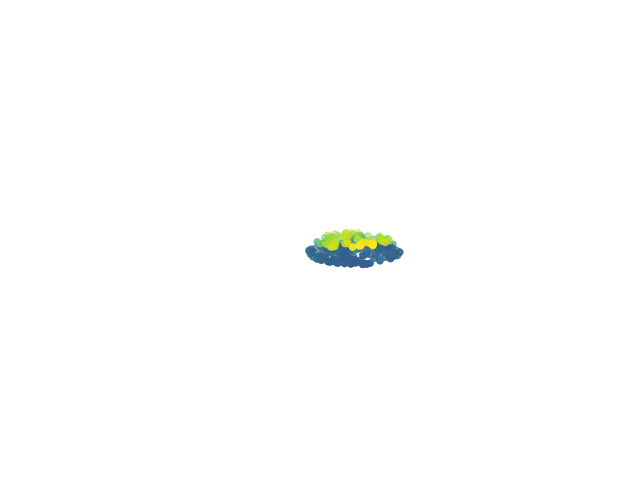

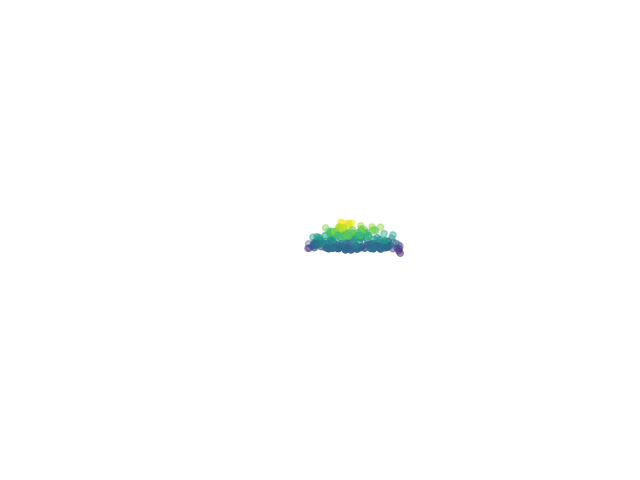

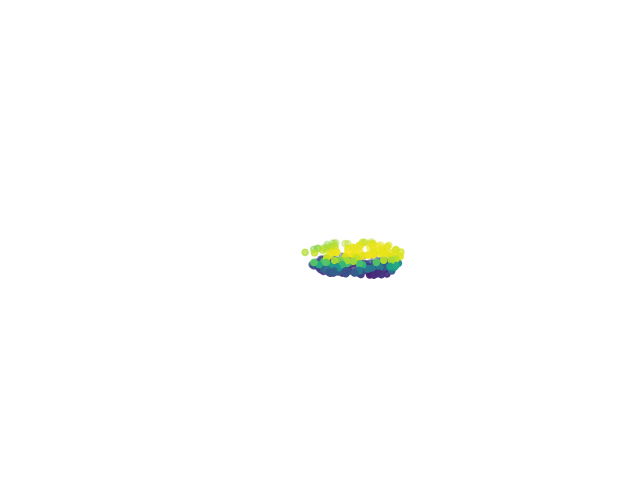

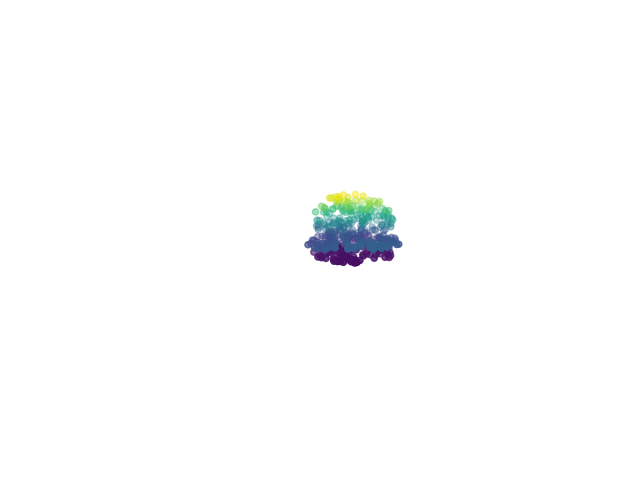

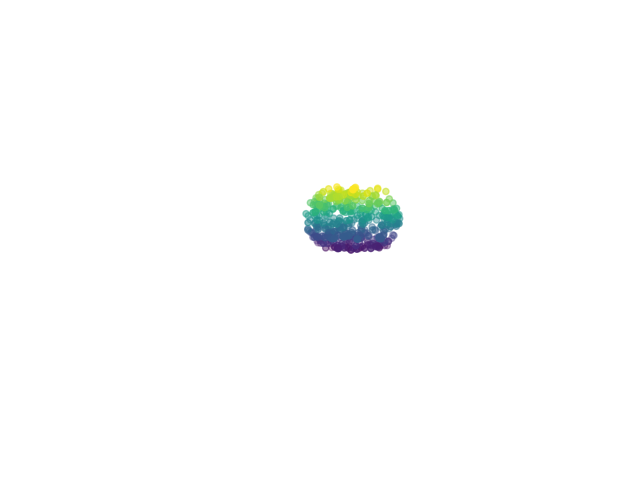

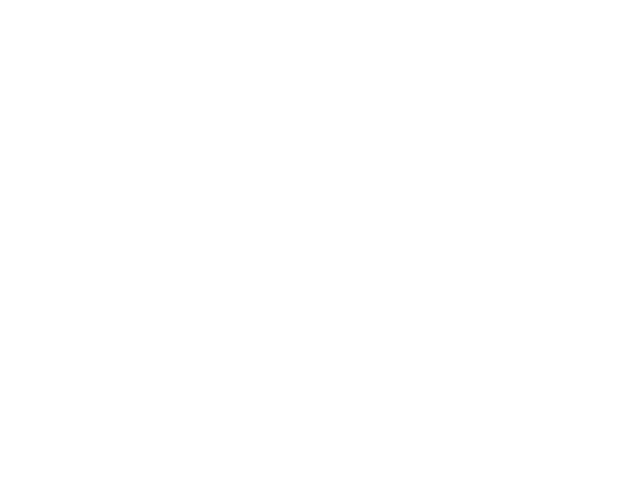

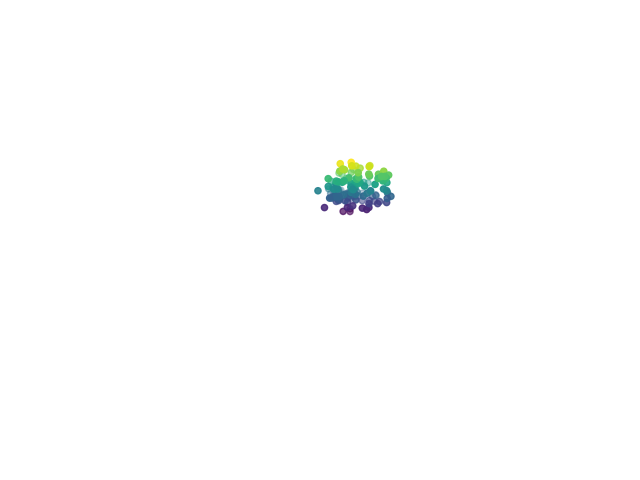

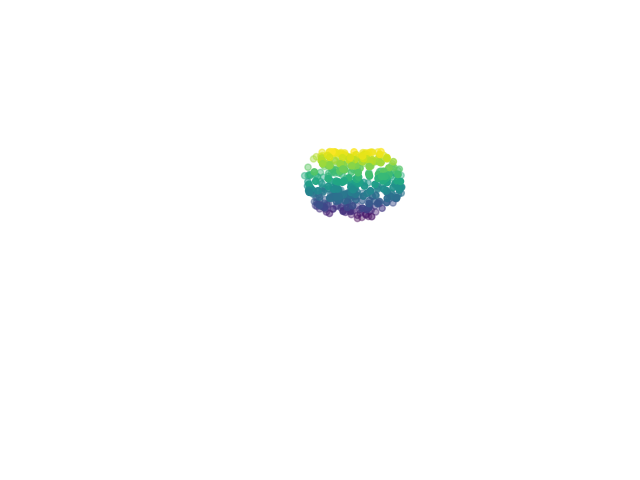

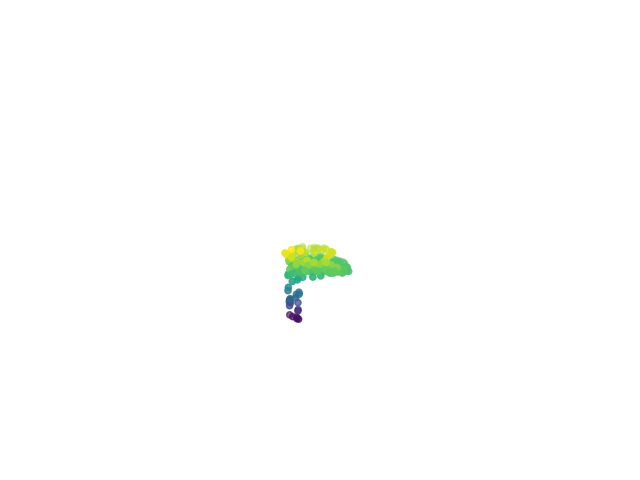

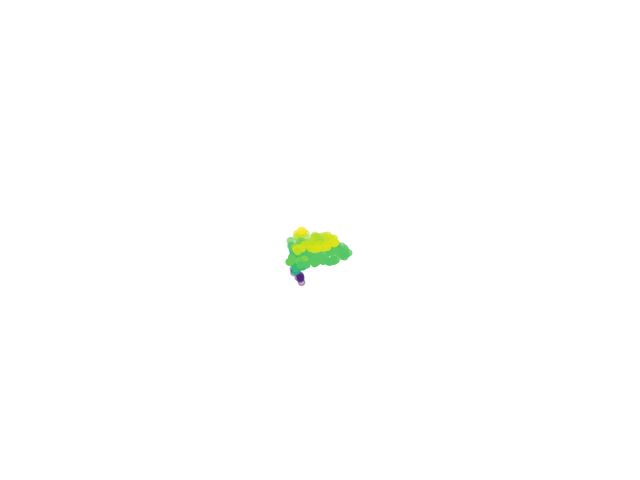

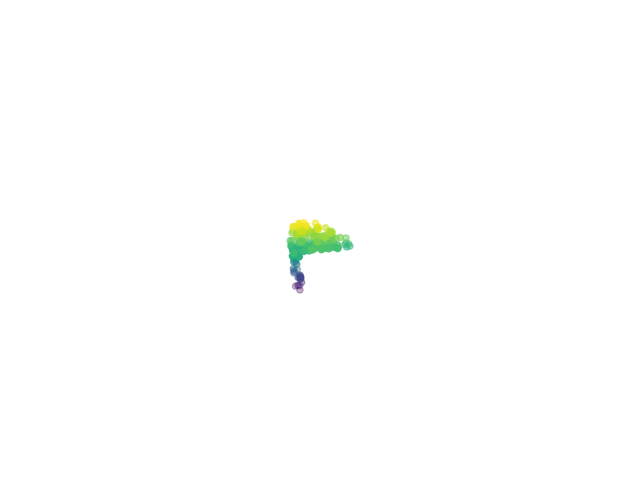

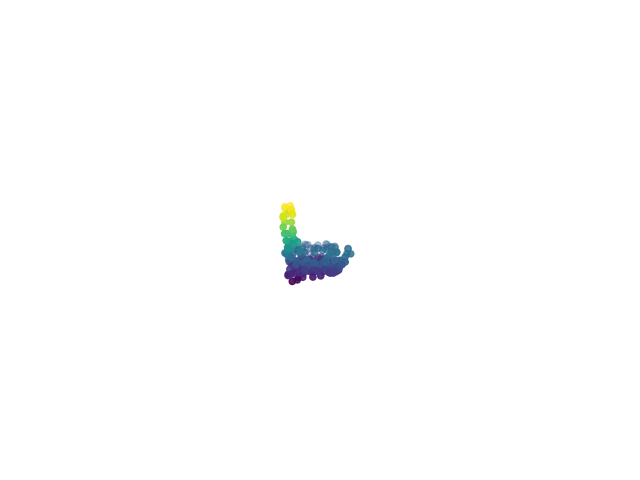

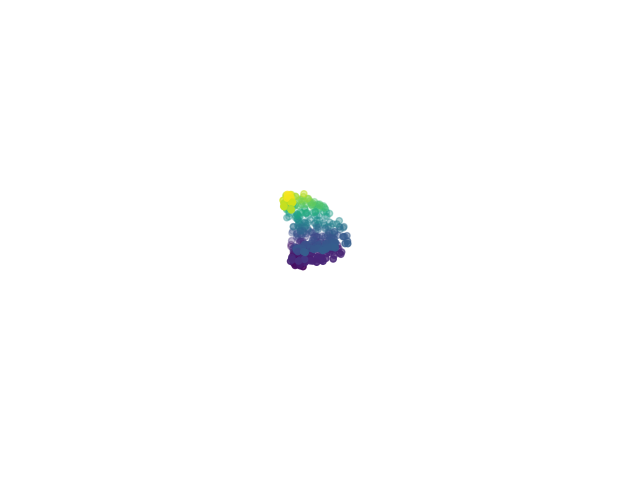

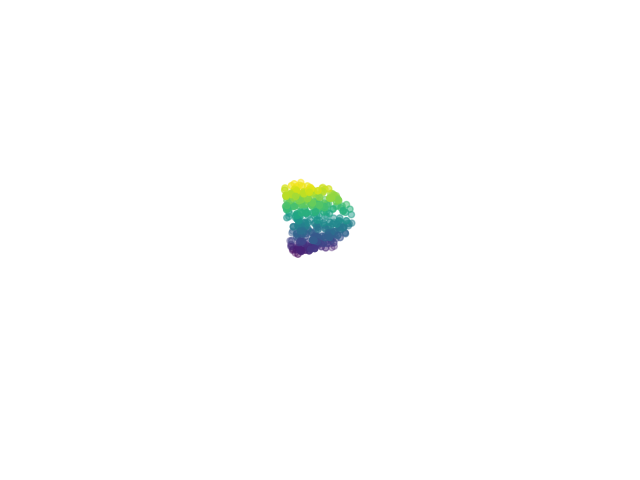

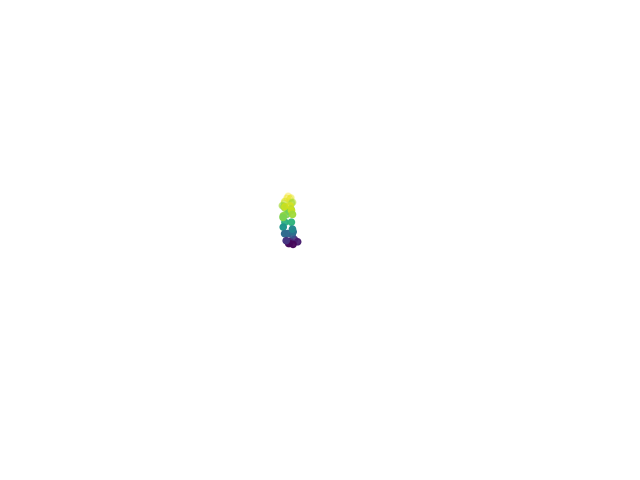

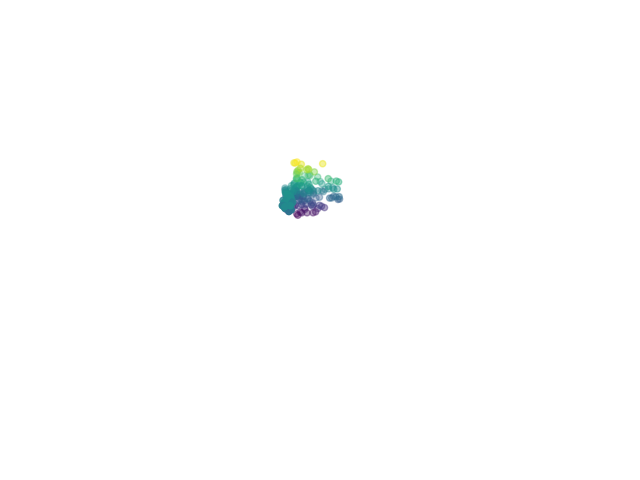

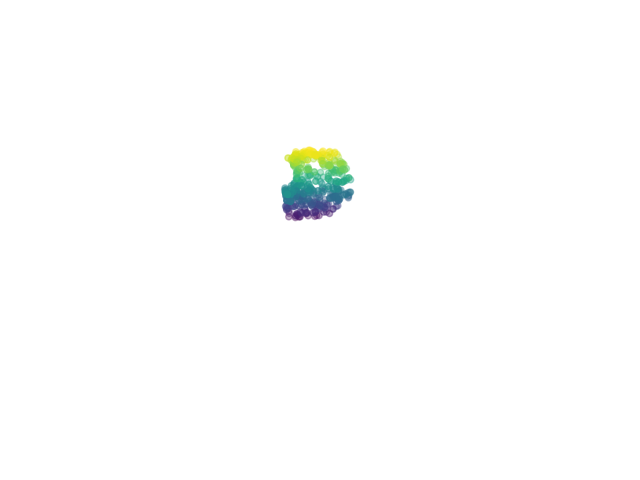

In [5]:
frames = []
for i in tqdm(np.linspace(-1.0, 1.0, 3)):
    for j in np.linspace(-1.0, 1.0, 3):
        for k in np.linspace(-1.0, 1.0, 3):
            p = [i, j, k]
            queried_points = ball_query(chair, np.array(p), 1)
            fig = visualize_pointcloud(queried_points, title="Chair", show_axis=False, axis_ranges=get_axis_ranges(chair))
            filename = f"visuals/chair_patch-{(i+1)*9 + (j+1)*3 + (k+1)}.png"
            plt.savefig(filename, bbox_inches='tight', pad_inches=0)
            frames.append(imageio.imread(filename))

imageio.mimsave('visuals/chair_patches.gif', frames, duration=200)
            

In [6]:
fig.savefig("chair_query.png", transparent=True, bbox_inches='tight', pad_inches=0, dpi=300)